# Testing the Full, Last Layer and Subnetwork functionality

### Model training

In [9]:
import Pkg
Pkg.activate("..")

  Activating project at `c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl`

In [10]:
using Flux
using Flux: gradient
using LaplaceRedux
using LinearAlgebra
using Plots
using Statistics
using Zygote
using DelimitedFiles

In [11]:
xs, ys = LaplaceRedux.Data.toy_data_non_linear(200)
X = hcat(xs...) # bring into tabular format
data = zip(xs,ys)

zip([[4.643297365818975, 0.7947006940167572], [1.7048536141580983, 4.027208660155597], [4.908474933467113, 2.2305320061094807], [4.685349248341857, 0.9829465519692895], [2.50216737038362, 2.462227128187794], [3.5960461833220987, 3.1026606027556802], [1.6864096048045152, 0.7607758381087897], [3.3231166153185923, 2.295883521315918], [1.8371066124282995, 1.2513594063625706], [3.621708576177362, 3.7532463927664934]  …  [-1.5595455100619233, 4.964392340882039], [-4.16533572016246, 1.2617020581745173], [-2.856505154445389, 1.649691623537141], [-2.118733493295419, 3.9670433291703375], [-2.3117515171894976, 4.458990651154323], [-3.837657578587789, 2.7518605219008183], [-2.709008908181693, 1.4887907265529856], [-4.503121915971579, 2.1448905488304906], [-3.2083835854780123, 4.183582885134861], [-2.7176401167779654, 2.2914210347114494]], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [12]:
n_hidden = 10
D = size(X,1)
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, 1)
)
println(D)
print(Flux.params(nn))
loss(x, y) = Flux.Losses.logitbinarycrossentropy(nn(x), y) 

2
Params([Float32[0.25703222 -0.51222295; -0.15087467 -0.4287984; -0.4565967 -0.22745895; 0.1251688 0.42789435; -0.68399346 0.53648096; 0.6637117 -0.10511668; -0.07355712 0.63600445; -0.25155607 0.24414; -0.29916668 0.21095365; 0.34594005 0.22778441], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.52255297 -0.49376667 0.18102188 0.28968662 0.16911307 0.49017933 -0.019633166 0.34394032 -0.25264353 0.7187858], Float32[0.0]])

loss (generic function with 1 method)

In [13]:
using Flux.Optimise: update!, Adam
opt = Adam(1e-3)
epochs = 100
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
  for d in data
    gs = gradient(Flux.params(nn)) do
      l = loss(d...)
    end
    update!(opt, Flux.params(nn), gs)
  end
  if epoch % show_every == 0
    println("Epoch " * string(epoch))
    @show avg_loss(data)
  end
end

Epoch 10


avg_loss(data) = 0.6519492039084435


Epoch 20
avg_loss(data) = 0.5396206595003605


Epoch 30
avg_loss(data) = 0.3949742229282856


Epoch 40
avg_loss(data) = 0.27557271741330625


Epoch 50
avg_loss(data) = 0.19574778106063603


Epoch 60
avg_loss(data) = 0.14603318316861988


Epoch 70
avg_loss(data) = 0.11446887055411935


Epoch 80
avg_loss(data) = 0.09335352041292935


Epoch 90
avg_loss(data) = 0.07840183917200193


Epoch 100
avg_loss(data) = 0.06728417569305747


### LA for Full Neural Network

loss(exp.(logP₀), exp.(logσ)) = 35.72924232120375
Log likelihood: -13.456835138611495
Log det ratio: 31.753743274358
Scatter: 12.791071090826506
loss(exp.(logP₀), exp.(logσ)) = 35.63568665025923
Log likelihood: -13.456835138611495
Log det ratio: 33.61099170497785
Scatter: 10.746711318317619
loss(exp.(logP₀), exp.(logσ)) = 35.63554920702997
Log likelihood: -13.456835138611495
Log det ratio: 33.548688161208304
Scatter: 10.808739975628647
loss(exp.(logP₀), exp.(logσ)) = 35.63554673861421
Log likelihood: -13.456835138611495
Log det ratio: 33.53831710053386
Scatter: 10.819106099471561

┌ Info: Iteration 50: P₀=0.07084754995996138, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 100: P₀=0.05952419165083329, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 150: P₀=0.05986775774991812, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 200: P₀=0.059925173932787956, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314



loss(exp.(logP₀), exp.(logσ)) = 35.635546721076174
Log likelihood: -13.456835138611495
Log det ratio: 33.53915846085228
Scatter: 10.81826470407708
loss(exp.(logP₀), exp.(logσ)) = 35.63554672103874
Log likelihood: -13.456835138611495
Log det ratio: 33.53911987380968
Scatter: 10.818303291044817
loss(exp.(logP₀), exp.(logσ)) = 35.6355467210387
Log likelihood: -13.456835138611495
Log det ratio: 33.539121405183195
Scatter: 10.818301759671211


┌ Info: Iteration 250: P₀=0.05992051358794091, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 300: P₀=0.059920727314540116, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 350: P₀=0.059920718832524256, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


loss(exp.(logP₀), exp.(logσ)) = 35.63554672103875
Log likelihood: -13.456835138611495
Log det ratio: 33.53912131410384
Scatter: 10.818301850750663
loss(exp.(logP₀), exp.(logσ)) = 35.63554672103871
Log likelihood: -13.456835138611495
Log det ratio: 33.539121324310855
Scatter: 10.818301840543574
loss(exp.(logP₀), exp.(logσ)) = 35.635546721038686
Log likelihood: -13.456835138611495
Log det ratio: 33.53912132306013
Scatter: 10.818301841794252
...

┌ Info: Iteration 400: P₀=0.05992071933699773, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 450: P₀=0.05992071928046238, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 500: P₀=0.05992071928738969, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


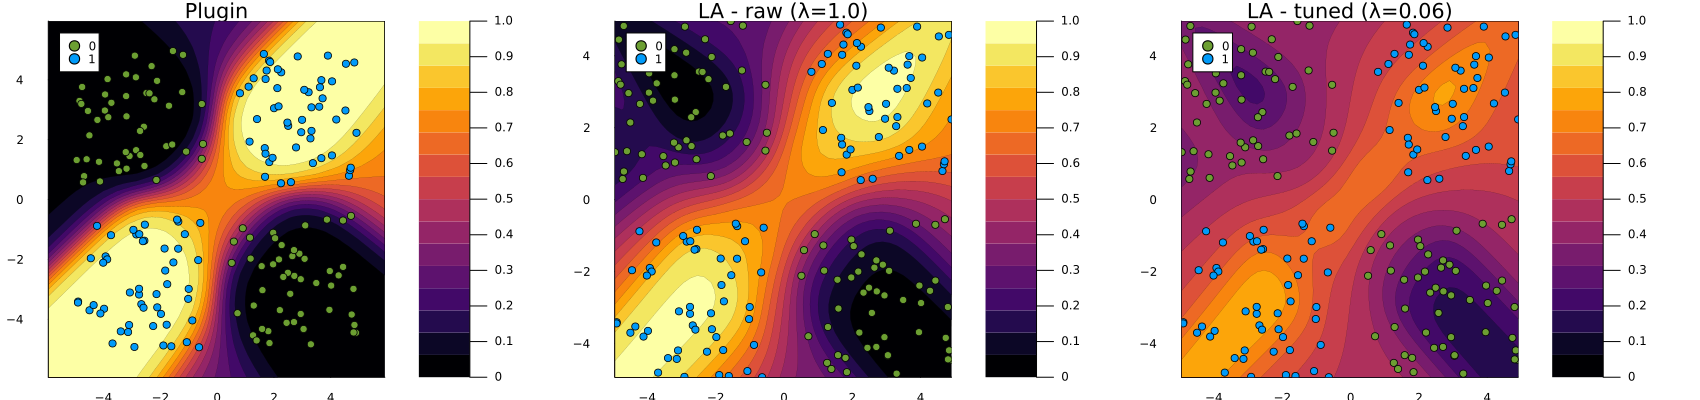

In [14]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:all)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

### LA for Last Layer of Neural Network

loss(exp.(logP₀), exp.(logσ)) = 21.645484850448508
Log likelihood: -13.456835138611495
Log det ratio: 11.888933492731642
Scatter: 4.488365930942382
loss(exp.(logP₀), exp.(logσ)) = 21.639021669352402
Log likelihood: -13.456835138611495
Log det ratio: 12.269973677922536
Scatter: 4.094399383559278


┌ Info: Iteration 50: P₀=0.07552249230409926, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 100: P₀=0.06889350170917108, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


loss(exp.(logP₀), exp.(logσ)) = 21.63867222144458
Log likelihood: -13.456835138611495
Log det ratio: 12.19708116758007
Scatter: 4.166592998086101
loss(exp.(logP₀), exp.(logσ)) = 21.638672101785147
Log likelihood: -13.456835138611495
Log det ratio: 12.198285220953423
Scatter: 4.165388705393877
loss(exp.(logP₀), exp.(logσ)) = 21.63867210080293
Log likelihood: -13.456835138611495
Log det ratio: 12.198420074706913
Scatter: 4.165253849675954
loss(exp.(logP₀), exp.(logσ)) = 21.638672100788582
Log likelihood: -13.456835138611495
Log det ratio: 12.198404656852354
Scatter: 4.165269267501823


┌ Info: Iteration 150: P₀=0.0701082515271215, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 200: P₀=0.07008798776365395, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 250: P₀=0.07008571864387281, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 300: P₀=0.07008597806849491, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


loss(exp.(logP₀), exp.(logσ)) = 21.638672100788515
Log likelihood: -13.456835138611495
Log det ratio: 12.198405624871533
Scatter: 4.165268299482507
loss(exp.(logP₀), exp.(logσ)) = 21.63867210078852
Log likelihood: -13.456835138611495
Log det ratio: 12.198405603695651
Scatter: 4.165268320658397
loss(exp.(logP₀), exp.(logσ)) = 21.638672100788522
Log likelihood: -13.456835138611495
Log det ratio: 12.198405599150384
Scatter: 4.1652683252036695
loss(exp.(logP₀), exp.(logσ)) = 21.63867210078852
Log likelihood: -13.456835138611495
Log det ratio: 12.198405599895398
Scatter: 4.165268324458646
...

┌ Info: Iteration 350: P₀=0.07008596178033291, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 400: P₀=0.07008596213664434, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 450: P₀=0.07008596221312434, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 500: P₀=0.07008596220058837, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


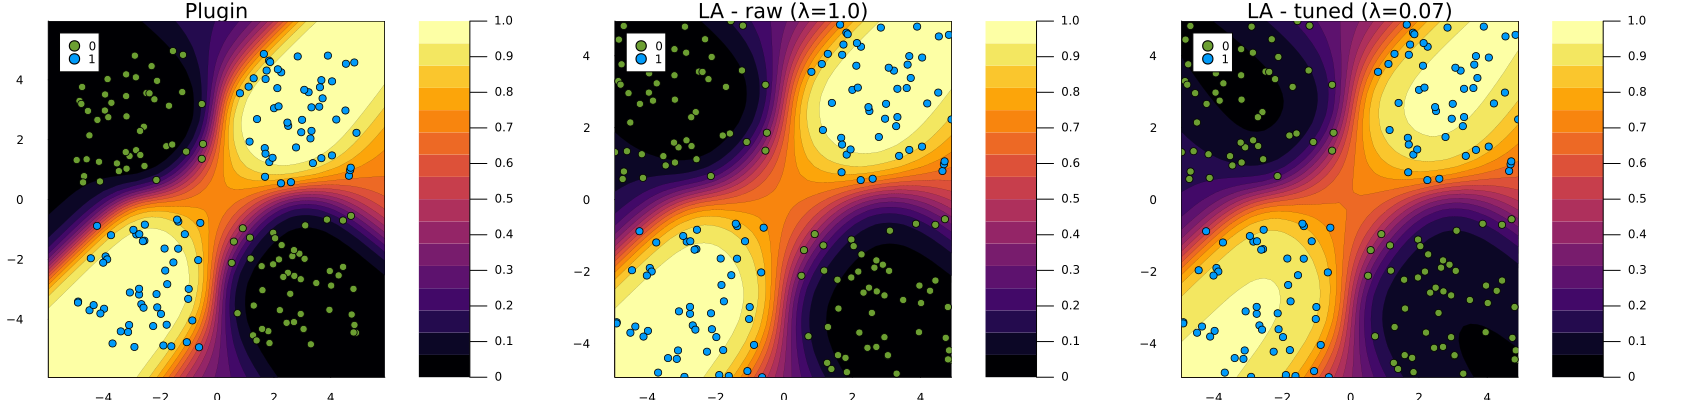

In [15]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:last_layer)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

### LA for Subset of Neural Network

Looking at the plot for tuned Laplace, by selecting just 4 of the 41 weights in the neural network provided in this notebook, we can see that there is not much information from the gradients and the jacobian that Laplace Approximation can use in order to adjust its predictive uncertainty.

[3, 28, 29, 30]

loss(exp.(logP₀), exp.(logσ)) = 16.54204775438758
Log likelihood: -13.456835138611495
Log det ratio: 4.186865781661703
Scatter: 1.9835594498904627
loss(exp.(logP₀), exp.(logσ)) = 16.52088082781898
Log likelihood: -13.456835138611495
Log det ratio: 3.7535951113483534
Scatter: 2.3744962670666165
loss(exp.(logP₀), exp.(logσ)) = 16.52072437831518
Log likelihood: -13.456835138611495
Log det ratio: 3.787510294731046
Scatter: 2.3402681846763227
loss(exp.(logP₀), exp.(logσ)) = 16.520724083663502
Log likelihood: -13.456835138611495
Log det ratio: 3.786240400015447
Scatter: 2.3415374900885704
loss(exp.(logP₀), exp.(logσ)) = 16.52072408018935
Log likelihood: -13.456835138611495
Log det ratio: 3.7860856740860713
Scatter: 2.3416922090696355


┌ Info: Iteration 50: P₀=0.10647501090008071, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 100: P₀=0.12746001433538107, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 150: P₀=0.12562269332854326, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 200: P₀=0.12569082806865, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 250: P₀=0.12569913319164305, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


loss(exp.(logP₀), exp.(logσ)) = 16.52072408018925
Log likelihood: -13.456835138611495
Log det ratio: 3.786086049067789
Scatter: 2.3416918340877215
loss(exp.(logP₀), exp.(logσ)) = 16.52072408018918
Log likelihood: -13.456835138611495
Log det ratio: 3.7860866839340463
Scatter: 2.3416911992213207
loss(exp.(logP₀), exp.(logσ)) = 16.52072408018918
Log likelihood: -13.456835138611495
Log det ratio: 3.7860867452954086
Scatter: 2.3416911378599568
loss(exp.(logP₀), exp.(logσ)) = 16.52072408018918
Log likelihood: -13.456835138611495
Log det ratio: 3.7860867499536486
Scatter: 2.3416911332017167


┌ Info: Iteration 300: P₀=0.12569911306307904, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 350: P₀=0.12569907898423813, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 400: P₀=0.12569907569043623, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 450: P₀=0.1256990754403877, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


loss(exp.(logP₀), exp.(logσ)) = 16.52072408018918
Log likelihood: -13.456835138611495
Log det ratio: 3.7860867502727
Scatter: 2.341691132882666
...


┌ Info: Iteration 500: P₀=0.12569907542326142, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


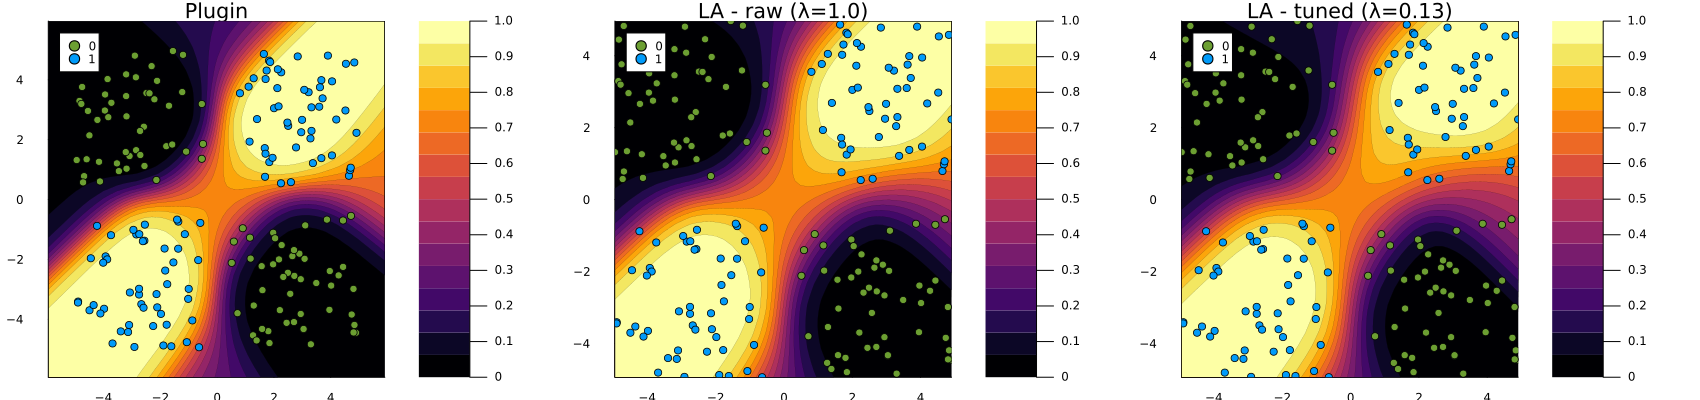

In [16]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[1, 2, 1], [2, 8], [2, 9], [2, 10]])
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

When providing all 41 weights, the uncertainties are much higher.

[3, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

loss(exp.(logP₀), exp.(logσ)) = 35.72924232120375
Log likelihood: -13.456835138611495
Log det ratio: 31.753743274358
Scatter: 12.791071090826506
loss(exp.(logP₀), exp.(logσ)) = 35.63568665025923
Log likelihood: -13.456835138611495
Log det ratio: 33.61099170497786
Scatter: 10.746711318317614
loss(exp.(logP₀), exp.(logσ)) = 35.63554920702998
Log likelihood: -13.456835138611495
Log det ratio: 33.54868816120833
Scatter: 10.80873997562864


┌ Info: Iteration 50: P₀=0.07084754995996138, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 100: P₀=0.05952419165083326, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 150: P₀=0.0598677577499181, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


loss(exp.(logP₀), exp.(logσ)) = 35.63554673861421
Log likelihood: -13.456835138611495
Log det ratio: 33.538317100533874
Scatter: 10.819106099471561
loss(exp.(logP₀), exp.(logσ)) = 35.635546721076174
Log likelihood: -13.456835138611495
Log det ratio: 33.53915846085228
Scatter: 10.81826470407708
loss(exp.(logP₀), exp.(logσ)) = 35.635546721038736
Log likelihood: -13.456835138611495
Log det ratio: 33.53911987380967
Scatter: 10.818303291044817
loss(exp.(logP₀), exp.(logσ)) = 35.6355467210387
Log likelihood: -13.456835138611495
Log det ratio: 33.539121405183195
Scatter: 10.818301759671211

┌ Info: Iteration 200: P₀=0.059925173932787956, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 250: P₀=0.05992051358794091, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 300: P₀=0.059920727314540116, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 350: P₀=0.059920718832524256, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314



loss(exp.(logP₀), exp.(logσ)) = 35.635546721038715
Log likelihood: -13.456835138611495
Log det ratio: 33.53912131410378
Scatter: 10.81830185075066
loss(exp.(logP₀), exp.(logσ)) = 35.63554672103869
Log likelihood: -13.456835138611495
Log det ratio: 33.53912132431083
Scatter: 10.818301840543574
loss(exp.(logP₀), exp.(logσ)) = 35.63554672103872
Log likelihood: -13.456835138611495
Log det ratio: 33.5391213230602
Scatter: 10.818301841794247
...


┌ Info: Iteration 400: P₀=0.059920719336997705, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 450: P₀=0.05992071928046238, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314
┌ Info: Iteration 500: P₀=0.059920719287389665, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:314


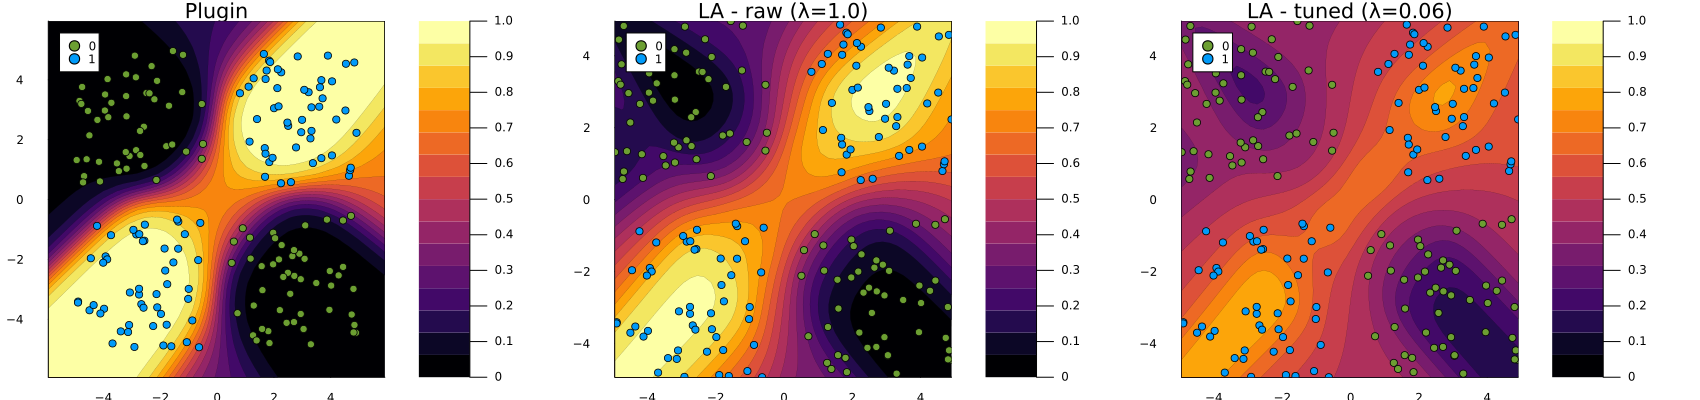

In [18]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[1, 2, 1], [1, 1, 1], [1, 1, 2], [1, 2, 2], [1, 3, 1], [1, 3, 2], [1, 4, 1], [1, 4, 2], [1, 5, 1], [1, 5, 2], [1, 6, 1], [1, 6, 2], [1, 7, 1], [1, 7, 2], [1, 8, 1], [1, 8, 2], [1, 9, 1], [1, 9, 2], [1, 10, 1], [1, 10, 2], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 1, 5], [3, 1, 6], [3, 1, 7], [3, 1, 8], [3, 1, 9], [3, 1, 10], [4, 1]])
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))